In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
## ======================================
## 1. Persiapan Data Sintetis
## ======================================

# Membuat dataset sintetis berdasarkan contoh yang diberikan
data = {
    'IPK': [3.8, 3.5, 2.8, 3.2, 2.5, 3.9, 3.0, 3.6, 2.9, 3.7, 3.1, 3.4, 2.7, 3.3, 2.4, 3.5, 3.0, 3.2, 2.6, 3.8],
    'Progress_Skripsi': [90, 75, 50, 80, 30, 95, 60, 85, 40, 92, 55, 78, 35, 70, 25, 88, 65, 72, 45, 96],
    'Kehadiran': [95, 85, 70, 90, 65, 98, 75, 88, 60, 94, 72, 82, 68, 80, 50, 90, 74, 84, 62, 97],
    'Jam_Organisasi': [5, 10, 15, 8, 20, 2, 12, 6, 18, 4, 14, 7, 16, 9, 20, 5, 11, 6, 17, 3],
    'Magang': [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
    'SKS': [144, 140, 130, 142, 125, 144, 135, 144, 128, 144, 132, 138, 126, 136, 120, 144, 134, 140, 124, 144],
    'Kategori': ['Lulus Cepat', 'Lulus Tepat Waktu', 'Butuh Perhatian', 'Lulus Tepat Waktu', 'Butuh Perhatian',
                'Lulus Cepat', 'Butuh Perhatian', 'Lulus Tepat Waktu', 'Butuh Perhatian', 'Lulus Cepat',
                'Butuh Perhatian', 'Lulus Tepat Waktu', 'Butuh Perhatian', 'Lulus Tepat Waktu', 'Butuh Perhatian',
                'Lulus Cepat', 'Butuh Perhatian', 'Lulus Tepat Waktu', 'Butuh Perhatian', 'Lulus Cepat']
}

df = pd.DataFrame(data)

# Konversi kategori ke nilai numerik
kategori_map = {'Lulus Cepat': 0, 'Lulus Tepat Waktu': 1, 'Butuh Perhatian': 2}
df['Kategori_Encoded'] = df['Kategori'].map(kategori_map)

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()



Input: IPK=3.8, Progress=90, Kehadiran=95, Organisasi=5, SKS=144
Output: {'kelulusan': 0.7894736842105263}

Input: IPK=3.5, Progress=75, Kehadiran=85, Organisasi=10, SKS=140
Output: {'kelulusan': 1.0}

Input: IPK=2.8, Progress=50, Kehadiran=70, Organisasi=15, SKS=130
Output: {'kelulusan': 1.6666666666666665}

Input: IPK=3.2, Progress=80, Kehadiran=90, Organisasi=8, SKS=142
Output: {'kelulusan': 0.8920552677029361}

Input: IPK=2.5, Progress=30, Kehadiran=65, Organisasi=20, SKS=125
Output: {'kelulusan': 1.6666666666666665}

Input: IPK=3.9, Progress=95, Kehadiran=98, Organisasi=2, SKS=144
Output: {'kelulusan': 0.7894736842105263}

Input: IPK=3.0, Progress=60, Kehadiran=75, Organisasi=12, SKS=135
Output: {'kelulusan': 1.0}

Input: IPK=3.6, Progress=85, Kehadiran=88, Organisasi=6, SKS=144
Output: {'kelulusan': 0.8215109573241063}

Input: IPK=2.9, Progress=40, Kehadiran=60, Organisasi=18, SKS=128
Output: {'kelulusan': 1.6666666666666665}

Input: IPK=3.7, Progress=92, Kehadiran=94, Organisas

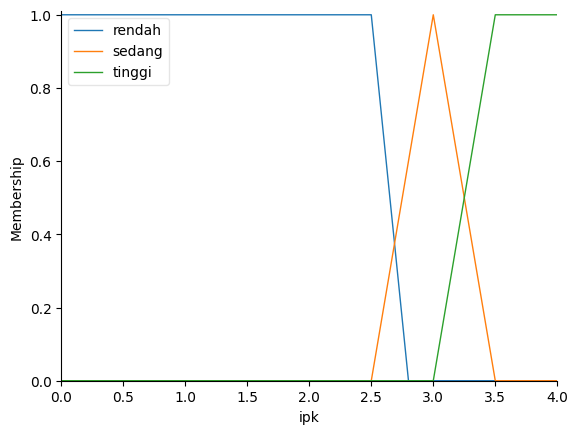

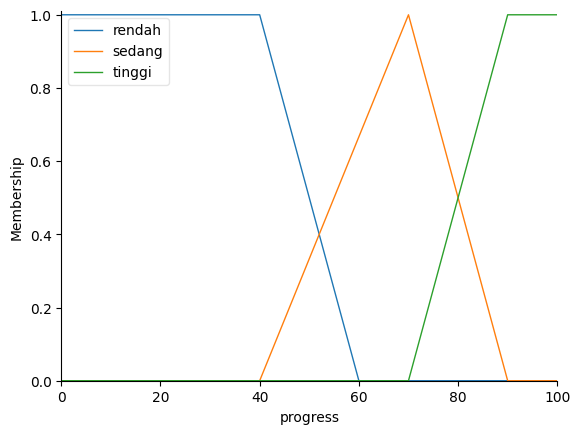

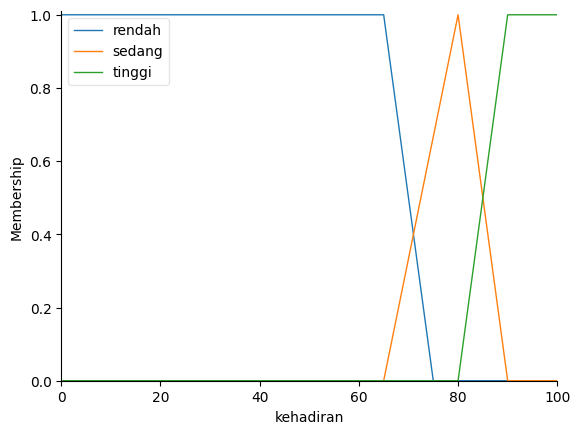

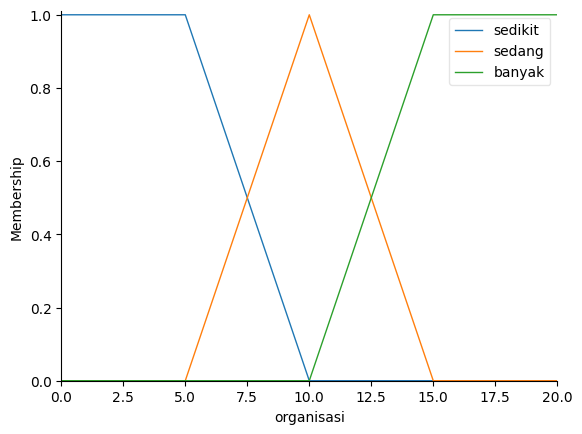

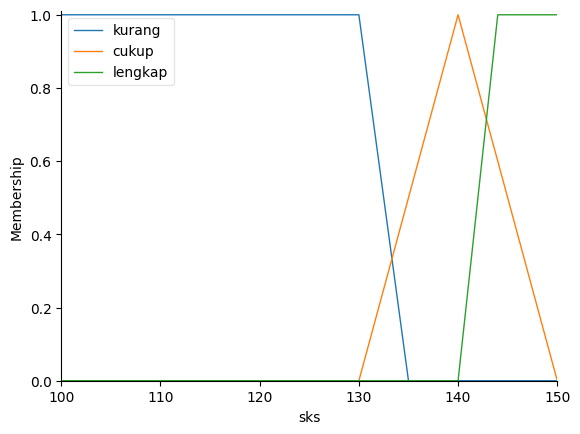

In [11]:
## ======================================
## 2. Fuzzy Inference System (FIS)
## ======================================

# Variabel input fuzzy
ipk = ctrl.Antecedent(np.arange(0, 4.1, 0.1), 'ipk')
progress = ctrl.Antecedent(np.arange(0, 101, 1), 'progress')
kehadiran = ctrl.Antecedent(np.arange(0, 101, 1), 'kehadiran')
organisasi = ctrl.Antecedent(np.arange(0, 21, 1), 'organisasi')
sks = ctrl.Antecedent(np.arange(100, 151, 1), 'sks')

# Variabel output fuzzy
kelulusan = ctrl.Consequent(np.arange(0, 3, 1), 'kelulusan')

# Fungsi keanggotaan untuk variabel input
ipk['rendah'] = fuzz.trapmf(ipk.universe, [0, 0, 2.5, 2.8])
ipk['sedang'] = fuzz.trimf(ipk.universe, [2.5, 3.0, 3.5])
ipk['tinggi'] = fuzz.trapmf(ipk.universe, [3.0, 3.5, 4.0, 4.0])

progress['rendah'] = fuzz.trapmf(progress.universe, [0, 0, 40, 60])
progress['sedang'] = fuzz.trimf(progress.universe, [40, 70, 90])
progress['tinggi'] = fuzz.trapmf(progress.universe, [70, 90, 100, 100])

kehadiran['rendah'] = fuzz.trapmf(kehadiran.universe, [0, 0, 65, 75])
kehadiran['sedang'] = fuzz.trimf(kehadiran.universe, [65, 80, 90])
kehadiran['tinggi'] = fuzz.trapmf(kehadiran.universe, [80, 90, 100, 100])

organisasi['sedikit'] = fuzz.trapmf(organisasi.universe, [0, 0, 5, 10])
organisasi['sedang'] = fuzz.trimf(organisasi.universe, [5, 10, 15])
organisasi['banyak'] = fuzz.trapmf(organisasi.universe, [10, 15, 20, 20])

sks['kurang'] = fuzz.trapmf(sks.universe, [100, 100, 130, 135])
sks['cukup'] = fuzz.trimf(sks.universe, [130, 140, 150])
sks['lengkap'] = fuzz.trapmf(sks.universe, [140, 144, 150, 150])

# Fungsi keanggotaan untuk variabel output
kelulusan['cepat'] = fuzz.trimf(kelulusan.universe, [0, 0, 1])
kelulusan['tepat'] = fuzz.trimf(kelulusan.universe, [0, 1, 2])
kelulusan['terlambat'] = fuzz.trimf(kelulusan.universe, [1, 2, 2])


# Visualisasikan untuk memastikan
ipk.view()
progress.view()
kehadiran.view()
organisasi.view()
sks.view()
# fig.show()

# Aturan fuzzy
rule1 = ctrl.Rule(progress['tinggi'] & sks['lengkap'], kelulusan['cepat'])
rule2 = ctrl.Rule(progress['sedang'] &  (organisasi['sedang'] | organisasi['sedikit']) & sks['lengkap'], kelulusan['cepat'])
rule3 = ctrl.Rule(progress['sedang'] &  organisasi['banyak'] & sks['lengkap'], kelulusan['tepat'])
rule4 = ctrl.Rule(sks['cukup'] & (ipk['tinggi']|ipk['sedang']), kelulusan['tepat'])
rule5 = ctrl.Rule(sks['cukup'] & kehadiran['rendah'], kelulusan['terlambat'])
rule6 = ctrl.Rule(sks['kurang']|progress['rendah']|ipk['rendah'], kelulusan['terlambat'])
# rule6 = ctrl.Rule(sks['kurang']|progress['rendah'], kelulusan['terlambat'])
# rule2 = ctrl.Rule(progress['rendah'] &  (organisasi['sedang'] | organisasi['sedikit']) & sks['lengkap'], kelulusan['cepat'])
# rule3 = ctrl.Rule(ipk['sedang'] & progress['sedang'] & kehadiran['sedang'] & organisasi['sedang'] & sks['cukup'], kelulusan['tepat'])
# rule4 = ctrl.Rule(ipk['sedang'] & progress['sedang'] & kehadiran['tinggi'] & organisasi['sedikit'] & sks['cukup'], kelulusan['tepat'])
# rule5 = ctrl.Rule(ipk['rendah'] | progress['rendah'] | kehadiran['rendah'], kelulusan['terlambat'])
# rule6 = ctrl.Rule(organisasi['banyak'] & (ipk['rendah'] | progress['rendah']), kelulusan['terlambat'])
# rule7 = ctrl.Rule(sks['kurang'] & (ipk['rendah'] | progress['rendah']), kelulusan['terlambat'])

# Sistem kontrol fuzzy
kelulusan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
kelulusan_sim = ctrl.ControlSystemSimulation(kelulusan_ctrl)

# Fungsi untuk mendapatkan output fuzzy
# Perbaikan fungsi fuzzy_predict
def fuzzy_predict(row):
    try:
        # Buat simulation object baru setiap kali
        sim = ctrl.ControlSystemSimulation(kelulusan_ctrl)
        
        # Set input values
        sim.input['ipk'] = float(row['IPK'])
        sim.input['progress'] = float(row['Progress_Skripsi'])
        sim.input['kehadiran'] = float(row['Kehadiran'])
        sim.input['organisasi'] = float(row['Jam_Organisasi'])
        sim.input['sks'] = float(row['SKS'])
        
        # Eksekusi sistem fuzzy
        sim.compute()
        
        # Debugging: Print input dan output
        print(f"\nInput: IPK={row['IPK']}, Progress={row['Progress_Skripsi']}, Kehadiran={row['Kehadiran']}, Organisasi={row['Jam_Organisasi']}, SKS={row['SKS']}")
        print("Output:", sim.output)
        
        return sim.output['kelulusan']
        
    except Exception as e:
        print(f"\nError processing row {row.name}: {str(e)}")
        print(f"Input values: IPK={row['IPK']}, Progress={row['Progress_Skripsi']}, Kehadiran={row['Kehadiran']}, Organisasi={row['Jam_Organisasi']}, SKS={row['SKS']}")
        return 1.5  # Nilai default

        
    except Exception as e:
        print(f"\nError processing row {row.name}: {str(e)}")
        print(f"Input values: IPK={row['IPK']}, Progress={row['Progress_Skripsi']}, Kehadiran={row['Kehadiran']}, Organisasi={row['Jam_Organisasi']}, SKS={row['SKS']}")
        return 1.5


# Tambahkan hasil fuzzy ke dataframe
df['Fuzzy_Output'] = df.apply(fuzzy_predict, axis=1)

In [22]:
## ======================================
## 3. Neural Network (NN) - Versi Diperbaiki
## ======================================

from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

# 1. Persiapan Data
X = df[['IPK', 'Progress_Skripsi', 'Kehadiran', 'Jam_Organisasi', 'Magang', 'SKS', 'Fuzzy_Output']]

# Gunakan LabelEncoder untuk y yang konsisten
le = LabelEncoder()
y = le.fit_transform(df['Kategori'])  # Gunakan kolom kategori asli, bukan encoded

# Bagi data dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Hitung class weight untuk menangani imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)

# 2. Normalisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Bangun Model dengan Improvement
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3, activation='softmax')
])
    

# 4. Compile dengan optimizer yang lebih baik
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',
                      keras.metrics.Precision(name='precision'),
                      keras.metrics.Recall(name='recall')])

# 5. Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10,
    restore_best_weights=True
)

# 6. Training dengan class weights
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Class weights: {0: 0.7619047619047619, 1: 1.3333333333333333, 2: 1.0666666666666667}
Epoch 1/100


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


InvalidArgumentError: Graph execution error:

Detected at node LogicalAnd_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Program Files\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Program Files\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Program Files\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3047, in run_cell

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3102, in _run_cell

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3489, in run_ast_nodes

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3549, in run_code

  File "C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1400\131080479.py", line 56, in <module>

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 368, in fit

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 216, in function

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 129, in multi_step_on_iterator

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 110, in one_step_on_data

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 82, in train_step

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\trainer.py", line 492, in compute_metrics

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\compile_utils.py", line 333, in update_state

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\compile_utils.py", line 20, in update_state

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\metrics\confusion_metrics.py", line 378, in update_state

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\metrics\metrics_utils.py", line 592, in update_confusion_matrix_variables

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\metrics\metrics_utils.py", line 565, in weighted_assign_add

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\numpy.py", line 3561, in logical_and

  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\numpy.py", line 1515, in logical_and

Incompatible shapes: [1,24] vs. [1,8]
	 [[{{node LogicalAnd_1}}]] [Op:__inference_multi_step_on_iterator_34275]

In [14]:
print(df['Kategori'].value_counts())

Kategori
Butuh Perhatian      9
Lulus Tepat Waktu    6
Lulus Cepat          5
Name: count, dtype: int64


In [ ]:
## ======================================
## 4. Fungsi Prediksi + Tips
## ======================================

def predict_with_tips(input_data):
    # Konversi ke dataframe
    input_df = pd.DataFrame([input_data], columns=X.columns[:-1])
    
    # Hitung output fuzzy
    fuzzy_out = fuzzy_predict(input_df.iloc[0])
    input_df['Fuzzy_Output'] = fuzzy_out
    
    # Normalisasi input
    input_scaled = scaler.transform(input_df)
    
    # Prediksi dengan NN
    pred_proba = model.predict(input_scaled)[0]
    pred_class = np.argmax(pred_proba)
    
    # Konversi ke kategori
    inv_kategori_map = {v: k for k, v in kategori_map.items()}
    kategori_pred = inv_kategori_map[pred_class]
    
    # Generate tips
    tips = []
    if input_data['IPK'] < 2.8:
        tips.append("Perbaiki IPK dengan belajar lebih intensif!")
    if input_data['Progress_Skripsi'] < 60:
        tips.append("Tingkatkan progress skripsi!")
    if input_data['Kehadiran'] < 75:
        tips.append("Perbanyak kehadiran kuliah!")
    if input_data['Jam_Organisasi'] > 12:
        tips.append("Kurangi jam organisasi, fokus skripsi!")
    if input_data['SKS'] < 135:
        tips.append("Selesaikan SKS yang kurang!")
    if input_data['Magang'] == 0:
        tips.append("Pertimbangkan magang sebagai syarat kelulusan!")
    
    if not tips:
        tips.append("Anda berada di jalur yang tepat! Pertahankan.")
    
    return {
        'Kategori': kategori_pred,
        'Tips': tips,
        'Probabilitas': {
            'Lulus Cepat': float(pred_proba[0]),
            'Lulus Tepat Waktu': float(pred_proba[1]),
            'Butuh Perhatian': float(pred_proba[2])
        }
    }

# Contoh penggunaan
sample_input = {
    'IPK': 3.2,
    'Progress_Skripsi': 78,
    'Kehadiran': 82,
    'Jam_Organisasi': 7,
    'Magang': 1,
    'SKS': 138
}

result = predict_with_tips(sample_input)
print("\nHasil Prediksi:")
print(f"Kategori: {result['Kategori']}")
print("Probabilitas:")
for k, v in result['Probabilitas'].items():
    print(f"- {k}: {v:.2f}")
print("Tips:")
for tip in result['Tips']:
    print(f"- {tip}")